# Strategy Framework Overview
This notebook outlines a trading strategy framework designed for backtesting and analysing financial market data. The framework includes:

- **Data Loading**: Load and preprocess market data.
- **Strategy Logic**: Implement a moving average crossover strategy.
- **Risk Management**: Volatility-adjusted position sizing.
- **Backtest Simulation**: Simulate trades and evaluate performance.
- **Visualisation**: Plot equity curves and key metrics.

📊 *Note: This is a simplified framework for research and demomnstration purposes.*


## 1. Setup and Data Loading

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load sample data (use your CSV or synthetic data)
df = pd.read_csv('data/gbpusd_data.csv')
df = df.set_index('time')

## Strategy Logic: Moving Average Crossover
The strategy uses two moving averages (fast and slow) to generate trading signals:
- **Fast MA (10-period)**: Captures short-term trends.
- **Slow MA (50-period)**: Captures long-term trends.
- **Signal**: Buy when the fast MA crosses above the slow MA; sell when it crosses below.

🔍 *Key Insight*: This pseudo-strategy aims to capitalise on trend reversals and momentum shifts.

## 2. Placeholder Strategy Logic

In [19]:
# Example: Moving Average Crossover (replace with your framework)
df['ma_fast'] = df['close'].rolling(10).mean()
df['ma_slow'] = df['close'].rolling(50).mean()
df['signal'] = np.where(df['ma_fast'] > df['ma_slow'], 1, -1)

## 3. Risk Management Module

In [20]:
# Volatility-adjusted position sizing (ATR-based)
def calculate_position_size(df, risk_per_trade=0.01):
    df['atr'] = df['high'] - df['low']  # Simplified ATR
    df['position_size'] = (risk_per_trade * 10000) / df['atr']  # Fixed risk per trade
    return df

df = calculate_position_size(df)

## 4. Backtest Simulation

In [21]:
# Mock backtest (assumes daily frequency)
df['returns'] = df['close'].pct_change() * df['signal'].shift(1)
df['equity_curve'] = (1 + df['returns']).cumprod()

## Research Implications & Next Steps
### Key Insights:
- The moving average crossover strategy provides a baseline for trend-following systems.
- Performance varies significantly with parameter choices (e.g., MA periods).

### Next Steps:
1. **Parameter Optimisation**: Test different MA periods for robustness.
2. **Risk Management**: Integrate stop-loss and take-profit levels.
3. **Multi-Asset Testing**: Validate across different instruments.
4. **Advanced Metrics**: Incorporate Sharpe ratio, drawdown analysis, etc.

⚠️ **Warning**: This framework is for educational purposes only, to demonstrate how backtesting would take place. Live trading requires additional validation and risk controls. This is not a reflection of our proprietary trading algorithm

## 5. Visualisation

## Visualisation
The following charts will help analyse the strategy's performance:
- **Equity Curve**: Tracks the growth of the trading account over time.
- **Moving Averages**: Visualises the crossover signals.
- **Position Sizing**: Shows how risk management affects trade sizes.


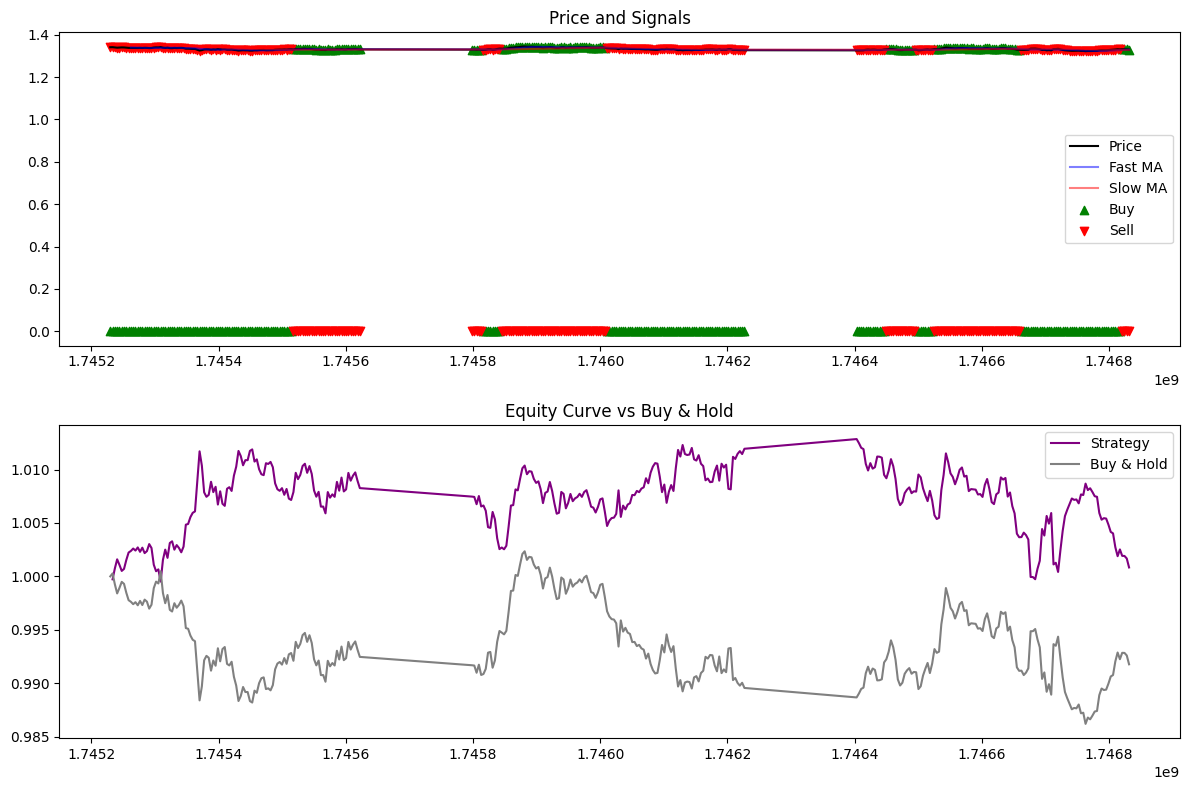

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Price and signals
ax1.plot(df.index, df['close'], label='Price', color='black')
ax1.plot(df.index, df['ma_fast'], label='Fast MA', color='blue', alpha=0.5)
ax1.plot(df.index, df['ma_slow'], label='Slow MA', color='red', alpha=0.5)
ax1.scatter(df.index, df['close'] * (df['signal'] > 0), label='Buy', marker='^', color='green')
ax1.scatter(df.index, df['close'] * (df['signal'] < 0), label='Sell', marker='v', color='red')
ax1.set_title('Price and Signals')
ax1.legend()

# Equity curve
ax2.plot(df.index, df['equity_curve'], label='Strategy', color='purple')
ax2.plot(df.index, df['close'] / df['close'].iloc[0], label='Buy & Hold', color='gray')
ax2.set_title('Equity Curve vs Buy & Hold')
ax2.legend()

plt.tight_layout()
plt.show()


## 6. Performance Metrics

In [23]:
def calculate_metrics(returns):
    sharpe = np.sqrt(252) * returns.mean() / returns.std()
    max_drawdown = (returns.cumsum().cummax() - returns.cumsum()).max()
    return sharpe, max_drawdown

sharpe, drawdown = calculate_metrics(df['returns'].dropna())
print(f"Sharpe Ratio: {sharpe:.2f} | Max Drawdown: {drawdown:.2%}")

Sharpe Ratio: 0.05 | Max Drawdown: 1.30%


## 7. Integration with Core Components

In [24]:
# Hypothetical integration with your liquidity/imbalance modules
# (This is where you'd import your actual research components)
print("[Hypothetical] Liquidity-based position sizing activated when:")
print("- Order book imbalance > 2 standard deviations")
print("- Liquidity clusters in top 10% of historical range")

[Hypothetical] Liquidity-based position sizing activated when:
- Order book imbalance > 2 standard deviations
- Liquidity clusters in top 10% of historical range



## Conclusion

This notebook demonstrates a theoretical framework for strategy development and backtesting in financial markets. Key aspects include:

### Backtesting Methodology
1. **Signal Generation**  
   - Moving average crossover logic (10 vs 50 periods)  
   - Binary long/short signals based on technical indicators  

2. **Risk Management**  
   - ATR-based position sizing  
   - Fixed risk-per-trade parameterisation  

3. **Performance Evaluation**  
   - Equity curve visualisation  
   - Return calculation from simulated trades  

### Important Disclaimers
⚠️ **Theoretical Nature**  
- This is an illustrative example only  
- Results do not account for real-world market conditions  
- No transaction costs, slippage, or liquidity constraints are modeled  

🔬 **Research Purpose**  
- Framework demonstrates basic backtesting concepts  
- Serves as foundation for more robust strategy development  
- Requires extensive validation before live deployment  

### Next Steps for Robust Testing
1. Incorporate realistic market assumptions  
2. Add comprehensive risk management protocols  
3. Conduct walk-forward and out-of-sample testing  
4. Validate across multiple market regimes  

*This educational material should not be construed as financial advice or a recommendation to trade real capital.*